### HowTo: Make an xsection model with `ttim`
 
This HowTo describes how to make an xsection (cross-section) model with `ttim`.

We start by importing the required packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import ttim as ttim

#
plt.rcParams["figure.figsize"] = (4, 3)  # set default figure size
plt.rcParams["font.size"] = 8  # set default font size

We will create an xsection model for a two-aquifer system with a river with a leaky river bottom (see Figure). 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

figdef1 = (5, 2)
figdef1plus = (5, 3)
figdef1new = (4, 3.2)
figax1 = [0.15, 0.2, 0.7, 0.6]
# wide figure
figdef2 = (8, 3.2)
figax2 = [0.15, 0.2, 0.7, 0.6]  # used for single graph

# VP 20210712: Added these for interface flow
C1light = '#2b7aa1'
C1dark = '#173e52' 

def gradient_fill(x, y, fill_color='C0', ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    z = np.empty((100, 1, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb(fill_color)
    z[:,:,:3] = rgb
    z[:,:,-1] = np.linspace(0.1, 0.5, 100)[:,None]

    xmin, xmax, ymin, ymax = x[0], x[1], y[0], y[1]
    im = ax.imshow(z, aspect='auto', extent=[xmin, xmax, ymin, ymax],
                   origin='lower', )#zorder=zorder)

def fancyarrow(ax, xytail, xyhead, scale=100):
    arrow = mpatches.FancyArrowPatch(xytail, xyhead,
                                 mutation_scale=scale)
    ax.add_patch(arrow)

def arrow(xystart, xyend, text="", arrow="<-", color='k', **kwds):
    plt.annotate(text,
                 xy=xystart, 
                 xytext=xyend, 
                 arrowprops=dict(arrowstyle=arrow, shrinkA=0, shrinkB=0, color=color),
                 color=color,
                 **kwds)

In [3]:
def solution12():
    plt.figure(figsize=figdef1)
    ax = plt.axes(figax1)
    plt.fill([-0.1, 0.3, 0.3, -0.1], [0.8, 0.8, 1.2, 1.2], color='grey', fill=False, hatch='//')
    plt.fill([0.3, 0.7, 0.7, 0.3], [0.8, 0.8, 1.0, 1.0], color='grey', fill=False, hatch='//')
    plt.fill([0.7, 1.1, 1.1, 0.7], [0.8, 0.8, 1.2, 1.2], color='grey', fill=False, hatch='//')


    plt.fill([-0.1, 1.1, 1.1, -0.1], [0, 0, -.2, -.2], color='grey', fill=False, hatch='///')
    #plt.fill([-0.1, 0.3, 0.3, -0.1], [0.8, 0.8, 1, 1], color='grey', fill=False, hatch='xxx')
    #plt.fill([0.7, 1.1, 1.1, 0.7], [0.8, 0.8, 1, 1], color='grey', fill=False, hatch='xxx')
    plt.fill([-0.1, 1.1, 1.1, -0.1], [-1, -1, -0.8, -0.8], color='grey', fill=False, hatch='xxx')
    plt.plot([-0.1,  0.3], [1.1, 1.1], 'C0')
    plt.plot([0.3,  0.7], [1.4, 1.4], 'C0')
    plt.plot([0.7,  1.1], [1.1, 1.1], 'C0')
    #gradient_fill([-0.1, 0.3], [1, 1.2])
    gradient_fill([0.3, 0.7], [1, 1.4])
    #gradient_fill([0.7, 1.1], [1, 1.2])
    plt.plot([0.3, 0.3], [0.8, 1.5], 'k')
    plt.plot([0.7, 0.7], [0.8, 1.5], 'k')
    plt.text(0.1, 1.35, '$h_0$', ha='center')
    plt.text(0.5, 1.55, '$h_r(t)$', ha='center')
    plt.text(0.9, 1.35, '$h_0$', ha='center')
    plt.plot([0.5, 0.5], [-1.3, -1.1], 'k')
    arrow((0.5, -1.2), (0.7, -1.2), "$x$", va='center')
    plt.text(-0.1, 0.4, 'left', va='center')
    plt.text(0.5, 0.25, 'river', va='center', ha='center')
    plt.text(1.1, 0.4, 'right', ha='right', va='center')
    #fancyarrow(ax, (0.9, 0.4), (1.03, 0.4), scale=20)
    arrow((0.3, 0.45), (0.7, 0.45), arrow="<->")
    plt.text(0.5, 0.55, '$2L$', ha='center')
    plt.ylim(-1.3, 1.5)
    plt.axis('off');

#solution12()
#plt.savefig('riverxsection.png')

<figure>
  <img src="riverxsection.svg" style="width:100%">
</figure>

| Parameter            | left/right | river |
| :------------: | :------: | ----: |
| $c_0$ (d)      |   500    | 200 |
| $k_0$ (m/d)    |   10     | 10 |
| $S_{s0}$ (m$^{-1}$)    |   1e-4     | 1e-4 |
| $c_1$ (d)      |  1000    | 1000 |
| $k_1$ (m/d)    |   20     | 20|
| $S_{s1}$ (m$^{-1}$)    |   1e-4     | 1e-4 |


In [4]:
zside = [2, 0, -10, -12, -22]
zriver = [1, 0, -10, -12, -22]
cside0 = 500 # d
criver0 = 200 # d
k0 = 10 # m/d
Ss0 = 1e-4 # m^(-1)
c1 = 1000 # d
k1 = 20 # m/d
Ss1 = 1e-4 # m^(-1)
L = 50 # m

In [5]:
ml = ttim.ModelXsection(naq=2, tmin=1e-3, tmax=1e2)

left = ttim.XsectionMaq(
    model=ml, x1=-np.inf, x2=-L,
    kaq=[k0, k1], z=zside, Saq=[Ss0, Ss1],
    c=[cside0, c1], topboundary="semi",
    name="left",
)

river = ttim.XsectionMaq(
    model=ml, x1=-L, x2=L,
    kaq=[k0, k1], z=zriver, Saq=[Ss0, Ss1],
    c=[criver0, c1], topboundary="semi",
    tsandhstar=[(0, 1)],
    name="river",
)

right = ttim.XsectionMaq(
    model=ml, x1=L, x2=np.inf,
    kaq=[k0, k1], z=zside, Saq=[Ss0, Ss1],
    c=[cside0, c1], topboundary="semi",
    name="right",
)

ml.solve()

self.neq  8
solution complete


In [6]:
ng = 100
nt = 100
x = np.linspace(-200, 200, ng)
y = np.zeros(ng)
t = np.logspace(-2, 1, nt)
h = ml.headalongline(x, y, t)

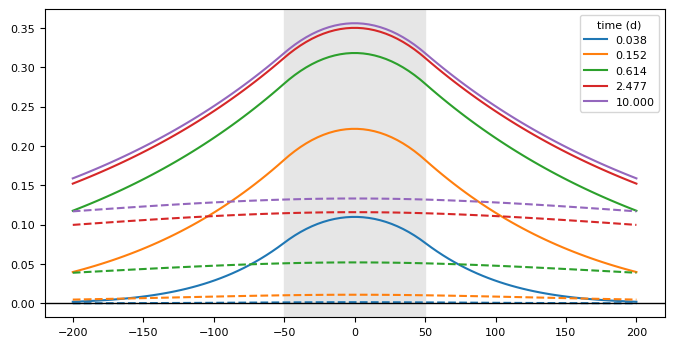

In [7]:
plt.figure(figsize=(8, 4))
for i, itime in enumerate(range(19, nt, 20)):
    plt.plot(x, h[0, itime], 'C' + str(i), label=f'{t[itime]:.3f}')
    plt.plot(x, h[1, itime], 'C' + str(i), ls='--')
plt.legend(title='time (d)')
plt.axhline(0, color='k', lw=1)
plt.axvspan(-L, L, color=[.9, .9, .9]);

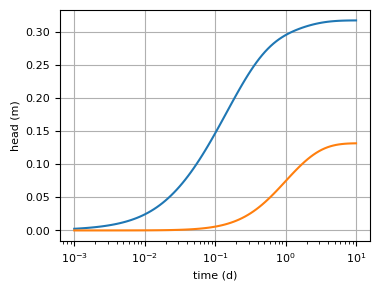

In [8]:
t = np.logspace(-3, 1, nt)
h = ml.head(x=50, y=0, t=t)
plt.semilogx(t, h[0])
plt.semilogx(t, h[1])
plt.xlabel('time (d)')
plt.ylabel('head (m)')
plt.grid()

### Sythetic example

In [9]:
ts = np.arange(0, 20)
np.random.seed(22)
hstar = np.random.randint(low=0, high=10, size=20) * 0.1
tsandh = list(zip(ts, hstar))

ml = ttim.ModelXsection(naq=2, tmin=1e-3, tmax=1e2)

left = ttim.XsectionMaq(
    model=ml, x1=-np.inf, x2=-L,
    kaq=[k0, k1], z=zside, Saq=[Ss0, Ss1],
    c=[cside0, c1], topboundary="semi",
    name="left",
)

river = ttim.XsectionMaq(
    model=ml, x1=-L, x2=L,
    kaq=[k0, k1], z=zriver, Saq=[Ss0, Ss1],
    c=[criver0, c1], topboundary="semi",
    tsandhstar=tsandh,
    name="river",
)

right = ttim.XsectionMaq(
    model=ml, x1=L, x2=np.inf,
    kaq=[k0, k1], z=zside, Saq=[Ss0, Ss1],
    c=[cside0, c1], topboundary="semi",
    name="right",
)

ml.solve()

tsyn = np.linspace(0.1, 10, 101)
xsyn = 50
hexact = ml.head(xsyn, 0, tsyn)
hsyn = hexact[0] + 0.01 * np.random.randn(len(tsyn))

self.neq  8
solution complete


In [10]:
crivguess = 100.0
csideguess = 100.0

In [11]:
k0 = 10
ml = ttim.ModelXsection(naq=2, tmin=1e-3, tmax=1e2)

left = ttim.XsectionMaq(
    model=ml, x1=-np.inf, x2=-L,
    kaq=[k0, k1], z=zside, Saq=[Ss0, Ss1],
    c=[csideguess, c1], topboundary="semi",
    name="left",
)

river = ttim.XsectionMaq(
    model=ml, x1=-L, x2=L,
    kaq=[k0, k1], z=zriver, Saq=[Ss0, Ss1],
    c=[crivguess, c1], topboundary="semi",
    tsandhstar=tsandh,
    name="river",
)

right = ttim.XsectionMaq(
    model=ml, x1=L, x2=np.inf,
    kaq=[k0, k1], z=zside, Saq=[Ss0, Ss1],
    c=[csideguess, c1], topboundary="semi",
    name="right",
)

In [12]:
cal = ttim.Calibrate(ml)
cal.series(
    name="synthetic",
    x=xsyn,
    y=0,
    layer=0,
    t=tsyn,
    h=hsyn,
)

cal.set_parameter(
    "c",
    layers=[0],
    initial=csideguess,
    pmin=1.0,
    pmax=1000.0,
    inhoms=(left, right),
)

# cal.set_parameter(
#     "c",
#     layers=[0],
#     initial=crivguess,
#     pmin=1.0,
#     pmax=1000.0,
#     inhoms=(river),
# )

# cal.set_parameter(
#     name="kaq",
#     layers=[0],
#     initial=12,
#     pmin=1.0,
#     pmax=1000.0,
#     inhoms=(river),
# )

#cal.fit()

from_lay, to_lay:  0 0
setting iaq.c right: XsectionMaq [50, inf]


In [27]:
p = np.array([77])
left.c[0:1] = p[0:1]
right.c[0:1] = p[0:1]
left.c, right.c

(array([  77., 1000.]), array([  77., 1000.]))

In [28]:
p[0:1] = 88
left.c, right.c

(array([  77., 1000.]), array([  77., 1000.]))

In [47]:
a = np.array([100,])
b = np.arange(3)
a[0] = b[1]
a, b

(array([1]), array([0, 1, 2]))

In [49]:
b[1:2] = 99
a, b

(array([1]), array([ 0, 99, 99]))

In [20]:
left.c[0] = 99
left.c, right.c

(array([  99., 1000.]), array([  77., 1000.]))

In [61]:
a = np.arange(5.)
b = a[1:3]
a, b

(array([0., 1., 2., 3., 4.]), array([1., 2.]))

In [62]:
b[:] = 8
a, b

(array([0., 8., 8., 3., 4.]), array([8., 8.]))

In [63]:
c = np.arange(5.)
c[1:3] = a[1:3]
a, b, c

(array([0., 8., 8., 3., 4.]), array([8., 8.]), array([0., 8., 8., 3., 4.]))

In [64]:
b[:] = 99
a, b, c

(array([ 0., 99., 99.,  3.,  4.]),
 array([99., 99.]),
 array([0., 8., 8., 3., 4.]))

In [ ]:
plt.plot(tsyn, hsyn, 'k.')
plt.plot(tsyn, hmodel[0])
plt.plot(tsyn, hexact[0], '--')

In [ ]:
river.c, left.c, right.c

In [ ]:
criver0, cside0

In [ ]:
cal.set_parameter?